# Data Wrangling: Clean, Transform, Merge, Reshape
# 数据规整化，清理、转换、合并、重塑

In [1]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
from pandas import Series, DataFrame
import pandas
import pandas as pd
np.set_printoptions(precision=4, threshold=500)
pd.options.display.max_rows = 100

In [2]:
%matplotlib inline

## Combining and merging data sets
## 合并数据集
+ pandas.merge  可以根据一个键或多个键将不同DataFrame的数据连接起来，根据共有键相连接
+ pandas.concat 可以沿着一个轴将多个对象堆叠到一起
+ pandas.combine_first可以将重复数据编接在一起，用一个对象中的值填充另一个对象中的缺失值，差不多相当于全外连接

### Database-style DataFrame merges
### 数据库风格与DataFrame的整合

In [3]:
df1 = DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                 'data1': range(7)})
df2 = DataFrame({'key': ['a', 'b', 'd'],
                 'data2': range(3)})
df1

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,a
6,6,b


In [4]:
df2

,data2,key
0,0,a
1,1,b
2,2,d


In [5]:
pd.merge(df1, df2)#由于df2没有c这个键，所以根据公有的键，含有c的df1中的行丢弃了


,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0


In [6]:
pd.merge(df1, df2, on='key')#没有指定时，使用相同的列名做key,最好还是显示指定一下

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0


In [7]:
df3 = DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                 'data1': range(7)})
df4 = DataFrame({'rkey': ['a', 'b', 'd'],
                 'data2': range(3)})
pd.merge(df3, df4, left_on='lkey', right_on='rkey')#指定左边DataFrame和右边DataFrame用来连接的Key

,data1,lkey,data2,rkey
0,0,b,1,b
1,1,b,1,b
2,6,b,1,b
3,2,a,0,a
4,4,a,0,a
5,5,a,0,a


In [8]:
pd.merge(df1, df2, how='outer')#内连接取交集，外链接取并集

,data1,key,data2
0,0.0,b,1.0
1,1.0,b,1.0
2,6.0,b,1.0
3,2.0,a,0.0
4,4.0,a,0.0
5,5.0,a,0.0
6,3.0,c,NaN
7,NaN,d,2.0


In [9]:
df1 = DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                 'data1': range(6)})
df2 = DataFrame({'key': ['a', 'b', 'a', 'b', 'd'],
                 'data2': range(5)})

In [10]:
df1

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,b


In [11]:
df2

,data2,key
0,0,a
1,1,b
2,2,a
3,3,b
4,4,d


In [12]:
pd.merge(df1, df2, on='key', how='left')#首先多对多时，做笛卡尔积，左边有n个b行，右边有m个b行，得到n*m个b行，how=left表明，保留所有df1的键

,data1,key,data2
0,0,b,1.0
1,0,b,3.0
2,1,b,1.0
3,1,b,3.0
4,2,a,0.0
5,2,a,2.0
6,3,c,NaN
7,4,a,0.0
8,4,a,2.0
9,5,b,1.0


In [13]:
pd.merge(df1, df2, how='inner')

,data1,key,data2
0,0,b,1
1,0,b,3
2,1,b,1
3,1,b,3
4,5,b,1
5,5,b,3
6,2,a,0
7,2,a,2
8,4,a,0
9,4,a,2


In [14]:
left = DataFrame({'key1': ['foo', 'foo', 'bar'],
                  'key2': ['one', 'two', 'one'],
                  'lval': [1, 2, 3]})
right = DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'],
                   'key2': ['one', 'one', 'one', 'two'],
                   'rval': [4, 5, 6, 7]})
left

,key1,key2,lval
0,foo,one,1
1,foo,two,2
2,bar,one,3


In [15]:
right

,key1,key2,rval
0,foo,one,4
1,foo,one,5
2,bar,one,6
3,bar,two,7


In [16]:
pd.merge(left, right, on=['key1', 'key2'], how='outer')#使用Outer时求同存异

,key1,key2,lval,rval
0,foo,one,1.0,4.0
1,foo,one,1.0,5.0
2,foo,two,2.0,NaN
3,bar,one,3.0,6.0
4,bar,two,NaN,7.0


In [17]:
pd.merge(left, right, on='key1')#根据左边挑右边，左右都有取出来，左有右无舍弃，左无不考虑右边有没有均舍弃

,key1,key2_x,lval,key2_y,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


In [18]:
pd.merge(left, right, on='key1', suffixes=('_left', '_right'))#指定附加到左右重叠列名上的字符串

,key1,key2_left,lval,key2_right,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


### Merging on index
### 索引上的合并

In [19]:
left1 = DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'],
                  'value': range(6)})
right1 = DataFrame({'group_val': [3.5, 7]}, index=['a', 'b'])

In [20]:
left1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [21]:
right1

,group_val
a,3.5
b,7.0


In [22]:
pd.merge(left1, right1, left_on='key', right_index=True)#与数据库连接相似，仅是说明把右侧的索引作为键，左侧使用列名'key'作为键

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


In [23]:
pd.merge(left1, right1, left_on='key', right_index=True, how='outer')

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0
5,c,5,NaN


In [24]:
lefth = DataFrame({'key1': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
                   'key2': [2000, 2001, 2002, 2001, 2002],
                   'data': np.arange(5.)})
righth = DataFrame(np.arange(12).reshape((6, 2)),
                   index=[['Nevada', 'Nevada', 'Ohio', 'Ohio', 'Ohio', 'Ohio'],
                          [2001, 2000, 2000, 2000, 2001, 2002]],
                   columns=['event1', 'event2'])
lefth

,data,key1,key2
0,0.0,Ohio,2000
1,1.0,Ohio,2001
2,2.0,Ohio,2002
3,3.0,Nevada,2001
4,4.0,Nevada,2002


In [25]:
righth

event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2002      10      11

In [26]:
pd.merge(lefth, righth, left_on=['key1', 'key2'], right_index=True)#层次化索引时需要用列表指定键

,data,key1,key2,event1,event2
0,0.0,Ohio,2000,4,5
0,0.0,Ohio,2000,6,7
1,1.0,Ohio,2001,8,9
2,2.0,Ohio,2002,10,11
3,3.0,Nevada,2001,0,1


In [27]:
pd.merge(lefth, righth, left_on=['key1', 'key2'],
         right_index=True, how='outer')

,data,key1,key2,event1,event2
0,0.0,Ohio,2000,4.0,5.0
0,0.0,Ohio,2000,6.0,7.0
1,1.0,Ohio,2001,8.0,9.0
2,2.0,Ohio,2002,10.0,11.0
3,3.0,Nevada,2001,0.0,1.0
4,4.0,Nevada,2002,NaN,NaN
4,NaN,Nevada,2000,2.0,3.0


In [28]:
left2 = DataFrame([[1., 2.], [3., 4.], [5., 6.]], index=['a', 'c', 'e'],
                 columns=['Ohio', 'Nevada'])
right2 = DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],
                   index=['b', 'c', 'd', 'e'], columns=['Missouri', 'Alabama'])

In [29]:
left2

,Ohio,Nevada
a,1.0,2.0
c,3.0,4.0
e,5.0,6.0


In [30]:
right2

,Missouri,Alabama
b,7.0,8.0
c,9.0,10.0
d,11.0,12.0
e,13.0,14.0


In [31]:
pd.merge(left2, right2, how='outer', left_index=True, right_index=True)

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [32]:
left2.join(right2, how='outer')#有相同或相似索引的DataFrame可以使用DataFrame的join方法left.join(right)

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [33]:
left1.join(right1, on='key')#或指定根据某个列来连接

,key,value,group_val
0,a,0,3.5
1,b,1,7.0
2,a,2,3.5
3,a,3,3.5
4,b,4,7.0
5,c,5,NaN


In [34]:
another = DataFrame([[7., 8.], [9., 10.], [11., 12.], [16., 17.]],
                    index=['a', 'c', 'e', 'f'], columns=['New York', 'Oregon'])

In [35]:
left2.join([right2, another])

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0,9.0,10.0
e,5.0,6.0,13.0,14.0,11.0,12.0


In [36]:
left2.join([right2, another], how='outer')

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
b,NaN,NaN,7.0,8.0,NaN,NaN
c,3.0,4.0,9.0,10.0,9.0,10.0
d,NaN,NaN,11.0,12.0,NaN,NaN
e,5.0,6.0,13.0,14.0,11.0,12.0
f,NaN,NaN,NaN,NaN,16.0,17.0


### Concatenating along an axis
### 轴向连接

In [37]:
arr = np.arange(12).reshape((3, 4))

In [38]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [39]:
np.concatenate([arr, arr], axis=1)#axis=1表示横轴，concatenate用于拼接ndarray

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

In [40]:
s1 = Series([0, 1], index=['a', 'b'])
s2 = Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = Series([5, 6], index=['f', 'g'])

In [41]:
pd.concat([s1, s2, s3])#concat用于拼接series

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [42]:
pd.concat([s1, s2, s3], axis=1)

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [43]:
s4 = pd.concat([s1 * 5, s3])

In [44]:
pd.concat([s1, s4], axis=1)

,0,1
a,0.0,0
b,1.0,5
f,NaN,5
g,NaN,6


In [45]:
pd.concat([s1, s4], axis=1, join='inner')

,0,1
a,0,0
b,1,5


In [46]:
pd.concat([s1, s4], axis=1, join_axes=[['a', 'c', 'b', 'e']])#指定index

,0,1
a,0.0,0.0
c,NaN,NaN
b,1.0,5.0
e,NaN,NaN


In [47]:
result = pd.concat([s1, s1, s3], keys=['one', 'two', 'three'])#one对应s1，two对应s1,three对应s3，通过key来指明属于原有的哪个series

In [48]:
result

one    a    0
       b    1
two    a    0
       b    1
three  f    5
       g    6
dtype: int64

In [49]:
# Much more on the unstack function later
result.unstack()

,a,b,f,g
one,0.0,1.0,NaN,NaN
two,0.0,1.0,NaN,NaN
three,NaN,NaN,5.0,6.0


In [50]:
pd.concat([s1, s2, s3], axis=1, keys=['one', 'two', 'three'])#series使用横轴拼接时，key成为列索引

,one,two,three
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [51]:
df1 = DataFrame(np.arange(6).reshape(3, 2), index=['a', 'b', 'c'],
                columns=['one', 'two'])
df2 = DataFrame(5 + np.arange(4).reshape(2, 2), index=['a', 'c'],
                columns=['three', 'four'])
pd.concat([df1, df2], axis=0, keys=['level1', 'level2'])#DataFrame也一样，key跟轴同向

four  one  three  two
level1 a   NaN  0.0    NaN  1.0
       b   NaN  2.0    NaN  3.0
       c   NaN  4.0    NaN  5.0
level2 a   6.0  NaN    5.0  NaN
       c   8.0  NaN    7.0  NaN

In [52]:
pd.concat({'level1': df1, 'level2': df2}, axis=1)#如果传入的是字典，则字典的key被当做key

level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [53]:
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'],
          names=['upper', 'lower'])#指明层次化索引的名称

upper level1     level2     
lower    one two  three four
a          0   1    5.0  6.0
b          2   3    NaN  NaN
c          4   5    7.0  8.0

In [54]:
df1 = DataFrame(np.random.randn(3, 4), columns=['a', 'b', 'c', 'd'])
df2 = DataFrame(np.random.randn(2, 3), columns=['b', 'd', 'a'])

In [55]:
df1

,a,b,c,d
0,-0.204708,0.478943,-0.519439,-0.555730
1,1.965781,1.393406,0.092908,0.281746
2,0.769023,1.246435,1.007189,-1.296221


In [56]:
df2

,b,d,a
0,0.274992,0.228913,1.352917
1,0.886429,-2.001637,-0.371843


In [57]:
pd.concat([df1, df2], ignore_index=True)#忽略自动生成的没有任何意义的索引

,a,b,c,d
0,-0.204708,0.478943,-0.519439,-0.555730
1,1.965781,1.393406,0.092908,0.281746
2,0.769023,1.246435,1.007189,-1.296221
3,1.352917,0.274992,NaN,0.228913
4,-0.371843,0.886429,NaN,-2.001637


### Combining data with overlap
### 合并重叠数据

In [59]:
a = Series([np.nan, 2.5, np.nan, 3.5, 4.5, np.nan],
           index=['f', 'e', 'd', 'c', 'b', 'a'])
b = Series(np.arange(len(a), dtype=np.float64),
           index=['f', 'e', 'd', 'c', 'b', 'a'])
b[-1] = np.nan

In [60]:
a

f    NaN
e    2.5
d    NaN
c    3.5
b    4.5
a    NaN
dtype: float64

In [61]:
b

f    0.0
e    1.0
d    2.0
c    3.0
b    4.0
a    NaN
dtype: float64

In [62]:
np.where(pd.isnull(a), b, a)#if isnull(a) b else a

array([ 0. ,  2.5,  2. ,  3.5,  4.5,  nan])

In [63]:
b[:-2].combine_first(a[2:])#与上面一致的功能

a    NaN
b    4.5
c    3.0
d    2.0
e    1.0
f    0.0
dtype: float64

In [64]:
df1 = DataFrame({'a': [1., np.nan, 5., np.nan],
                 'b': [np.nan, 2., np.nan, 6.],
                 'c': range(2, 18, 4)})
df2 = DataFrame({'a': [5., 4., np.nan, 3., 7.],
                 'b': [np.nan, 3., 4., 6., 8.]})
df1.combine_first(df2)#使用参数对象的数据为调用者对象中的数据打补丁

,a,b,c
0,1.0,NaN,2.0
1,4.0,2.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


## Reshaping and pivoting
## 重塑和轴向转换

### Reshaping with hierarchical indexing
### 重塑层次化索引

In [67]:
data = DataFrame(np.arange(6).reshape((2, 3)),
                 index=pd.Index(['Ohio', 'Colorado'], name='state'),
                 columns=pd.Index(['one', 'two', 'three'], name='number'))
data

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [69]:
result = data.stack()#stack将列索引转为行，变成了层次化索引的series
result

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int32

In [70]:
result.unstack()

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [77]:
result.unstack(0)#默认操作的是最内层，可以通过指定第n层或name属性来重塑

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [74]:
result.unstack('state')

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [78]:
s1 = Series([0, 1, 2, 3], index=['a', 'b', 'c', 'd'])
s2 = Series([4, 5, 6], index=['c', 'd', 'e'])
data2 = pd.concat([s1, s2], keys=['one', 'two'])
data2.unstack()

,a,b,c,d,e
one,0.0,1.0,2.0,3.0,NaN
two,NaN,NaN,4.0,5.0,6.0


In [80]:
data2.unstack().stack()#stack会滤除缺失数据

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
two  c    4.0
     d    5.0
     e    6.0
dtype: float64

In [81]:
data2.unstack().stack(dropna=False)

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
     e    NaN
two  a    NaN
     b    NaN
     c    4.0
     d    5.0
     e    6.0
dtype: float64

In [82]:
df = DataFrame({'left': result, 'right': result + 5},
               columns=pd.Index(['left', 'right'], name='side'))
df

side             left  right
state    number             
Ohio     one        0      5
         two        1      6
         three      2      7
Colorado one        3      8
         two        4      9
         three      5     10

In [85]:
df.unstack('state')

side   left          right         
state  Ohio Colorado  Ohio Colorado
number                             
one       0        3     5        8
two       1        4     6        9
three     2        5     7       10

In [86]:
df.unstack('state').stack('side')

state         Colorado  Ohio
number side                 
one    left          3     0
       right         8     5
two    left          4     1
       right         9     6
three  left          5     2
       right        10     7

### Pivoting "long" to "wide" format
### 将长格式转为宽格式

In [98]:
data = pd.read_csv('ch07/macrodata.csv')
periods = pd.PeriodIndex(year=data.year, quarter=data.quarter, name='date')
data = DataFrame(data.to_records(),
                 columns=pd.Index(['realgdp', 'infl', 'unemp'], name='item'),
                 index=periods.to_timestamp('D', 'end'))

ldata = data.stack().reset_index().rename(columns={0: 'value'})
wdata = ldata.pivot('date', 'item', 'value')

In [99]:
ldata[:10]

,date,item,value
0,1959-03-31,realgdp,2710.349
1,1959-03-31,infl,0.000
2,1959-03-31,unemp,5.800
3,1959-06-30,realgdp,2778.801
4,1959-06-30,infl,2.340
5,1959-06-30,unemp,5.100
6,1959-09-30,realgdp,2775.488
7,1959-09-30,infl,2.740
8,1959-09-30,unemp,5.300
9,1959-12-31,realgdp,2785.204


In [100]:
pivoted = ldata.pivot('date', 'item', 'value')#将一列作为列索引，前两个参数指定行索引和列索引，最后一个参数用于填充数据列的值
pivoted.head()

value                
item        infl   realgdp unemp
date                            
1959-03-31  0.00  2710.349   5.8
1959-06-30  2.34  2778.801   5.1
1959-09-30  2.74  2775.488   5.3
1959-12-31  0.27  2785.204   5.6
1960-03-31  2.31  2847.699   5.2

In [94]:
ldata['value2'] = np.random.randn(len(ldata))
ldata[:10]

,date,item,value,value2
0,1959-03-31,realgdp,2710.349,0.022074
1,1959-03-31,infl,0.000,-1.369179
2,1959-03-31,unemp,5.800,0.887204
3,1959-06-30,realgdp,2778.801,0.014331
4,1959-06-30,infl,2.340,-0.074155
5,1959-06-30,unemp,5.100,-0.048565
6,1959-09-30,realgdp,2775.488,1.235021
7,1959-09-30,infl,2.740,-0.433295
8,1959-09-30,unemp,5.300,1.391035
9,1959-12-31,realgdp,2785.204,0.820211


In [101]:
pivoted = ldata.pivot('date', 'item')#如果忽略最后一个参数就会带有层次化的列
pivoted[:5]

value                
item        infl   realgdp unemp
date                            
1959-03-31  0.00  2710.349   5.8
1959-06-30  2.34  2778.801   5.1
1959-09-30  2.74  2775.488   5.3
1959-12-31  0.27  2785.204   5.6
1960-03-31  2.31  2847.699   5.2

In [102]:
pivoted['value'][:5]

item,infl,realgdp,unemp
date,,,
1959-03-31,0.00,2710.349,5.8
1959-06-30,2.34,2778.801,5.1
1959-09-30,2.74,2775.488,5.3
1959-12-31,0.27,2785.204,5.6
1960-03-31,2.31,2847.699,5.2


In [104]:
unstacked = ldata.set_index(['date', 'item']).unstack('item')#pivot=先set_index再unstack
unstacked[:7]

value                
item        infl   realgdp unemp
date                            
1959-03-31  0.00  2710.349   5.8
1959-06-30  2.34  2778.801   5.1
1959-09-30  2.74  2775.488   5.3
1959-12-31  0.27  2785.204   5.6
1960-03-31  2.31  2847.699   5.2
1960-06-30  0.14  2834.390   5.2
1960-09-30  2.70  2839.022   5.6

## Data transformation
## 数据转换

### Removing duplicates
### 移除重复数据

In [105]:
data = DataFrame({'k1': ['one'] * 3 + ['two'] * 4,
                  'k2': [1, 1, 2, 3, 3, 4, 4]})
data

,k1,k2
0,one,1
1,one,1
2,one,2
3,two,3
4,two,3
5,two,4
6,two,4


In [107]:
data.duplicated()#返回布尔series，

0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool

In [108]:
data.drop_duplicates()

,k1,k2
0,one,1
2,one,2
3,two,3
5,two,4


In [110]:
data['v1'] = range(7)
data.drop_duplicates(['k1'])#根据列索引过滤重复项

,k1,k2,v1
0,one,1,0
3,two,3,3


In [114]:
data.drop_duplicates(['k1', 'k2'],keep='last')#原take_last变为了keep='first' 'last' 'false'

,k1,k2,v1
1,one,1,1
2,one,2,2
4,two,3,4
6,two,4,6


### Transforming data using a function or mapping
### 利用函数或映射进行数据转换


In [115]:
data = DataFrame({'food': ['bacon', 'pulled pork', 'bacon', 'Pastrami',
                           'corned beef', 'Bacon', 'pastrami', 'honey ham',
                           'nova lox'],
                  'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [116]:
meat_to_animal = {
  'bacon': 'pig',
  'pulled pork': 'pig',
  'pastrami': 'cow',
  'corned beef': 'cow',
  'honey ham': 'pig',
  'nova lox': 'salmon'
}

In [117]:
data['animal'] = data['food'].map(str.lower).map(meat_to_animal)#通过map使用函数或字典进行数据转换
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [118]:
data['food'].map(lambda x: meat_to_animal[x.lower()])

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

### Replacing values
### 替换值

In [119]:
data = Series([1., -999., 2., -999., -1000., 3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [121]:
data.replace(-999, np.nan)#replace替换值

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [123]:
data.replace([-999, -1000], np.nan)#多个值替换为一个值

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [125]:
data.replace([-999, -1000], [np.nan, 0])#多个值替换为多个值

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [126]:
data.replace({-999: np.nan, -1000: 0})#多个值替换为多个值

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

### Renaming axis indexes
### 重命名轴索引

In [127]:
data = DataFrame(np.arange(12).reshape((3, 4)),
                 index=['Ohio', 'Colorado', 'New York'],
                 columns=['one', 'two', 'three', 'four'])

In [129]:
data.index.map(str.upper)#通过映射转换

Index(['OHIO', 'COLORADO', 'NEW YORK'], dtype='object')

In [130]:
data.index = data.index.map(str.upper)
data

,one,two,three,four
OHIO,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


In [135]:
data.rename(index=str.title, columns=str.upper)#rename可以直接修改

,ONE,TWO,THREE,FOUR
Indiana,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [133]:
data.rename(index={'OHIO': 'INDIANA'},
            columns={'three': 'peekaboo'})

,one,two,peekaboo,four
INDIANA,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


In [136]:
# Always returns a reference to a DataFrame，inplace直接修改原值
_ = data.rename(index={'OHIO': 'INDIANA'}, inplace=True)
data

,one,two,three,four
INDIANA,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


### Discretization and binning
### 离散化和面元划分

In [137]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [139]:
bins = [18, 25, 35, 60, 100]#定义间隔
cats = pd.cut(ages, bins)#把数据划分为面元，即18~25，25~35。35~60
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [142]:
cats.codes#即对应的元素属于哪个面元的数组

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [153]:
cats.categories

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]]
              closed='right',
              dtype='interval[int64]')

In [ ]:
pd.value_counts(cats)

In [155]:
pd.cut(ages, [18, 26, 36, 61, 100], right=False)#通过right选择区间开闭方向

[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, interval[int64]): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]

In [156]:
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']#给分类命名
pd.cut(ages, bins, labels=group_names)

[Youth, Youth, Youth, YoungAdult, Youth, ..., YoungAdult, Senior, MiddleAged, MiddleAged, YoungAdult]
Length: 12
Categories (4, object): [Youth < YoungAdult < MiddleAged < Senior]

In [158]:
data = np.random.rand(20)
pd.cut(data, 4, precision=2)#根据最大最小值分为4个等长面元，精度为小数点后2位

[(0.0086, 0.24], (0.0086, 0.24], (0.7, 0.93], (0.7, 0.93], (0.7, 0.93], ..., (0.47, 0.7], (0.0086, 0.24], (0.0086, 0.24], (0.0086, 0.24], (0.0086, 0.24]]
Length: 20
Categories (4, interval[float64]): [(0.0086, 0.24] < (0.24, 0.47] < (0.47, 0.7] < (0.7, 0.93]]

In [160]:
data = np.random.randn(1000) # Normally distributed
cats = pd.qcut(data, 4) # Cut into quartiles根据分位数划分面元
cats

[(0.763, 2.615], (-3.55, -0.704], (0.763, 2.615], (-3.55, -0.704], (0.763, 2.615], ..., (-0.704, 0.0468], (-3.55, -0.704], (-3.55, -0.704], (0.763, 2.615], (-0.704, 0.0468]]
Length: 1000
Categories (4, interval[float64]): [(-3.55, -0.704] < (-0.704, 0.0468] < (0.0468, 0.763] < (0.763, 2.615]]

In [162]:
pd.value_counts(cats)#每个面元中的值的数量

(0.763, 2.615]      250
(0.0468, 0.763]     250
(-0.704, 0.0468]    250
(-3.55, -0.704]     250
dtype: int64

In [163]:
pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.])#自定义分位数划分面元

[(1.34, 2.615], (-3.55, -1.276], (0.0468, 1.34], (-1.276, 0.0468], (0.0468, 1.34], ..., (-1.276, 0.0468], (-3.55, -1.276], (-3.55, -1.276], (1.34, 2.615], (-1.276, 0.0468]]
Length: 1000
Categories (4, interval[float64]): [(-3.55, -1.276] < (-1.276, 0.0468] < (0.0468, 1.34] < (1.34, 2.615]]

### Detecting and filtering outliers
### 检测和过滤异常值

In [164]:
np.random.seed(12345)
data = DataFrame(np.random.randn(1000, 4))
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067684,0.067924,0.025598,-0.002298
std,0.998035,0.992106,1.006835,0.996794
min,-3.428254,-3.548824,-3.184377,-3.745356
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.366626,2.653656,3.260383,3.927528


In [165]:
col = data[3]
col[np.abs(col) > 3]#即使用数组运算

97     3.927528
305   -3.399312
400   -3.745356
Name: 3, dtype: float64

In [166]:
data[(np.abs(data) > 3).any(1)]#筛选出含有存在绝对值大于的行

,0,1,2,3
5,-0.539741,0.476985,3.248944,-1.021228
97,-0.774363,0.552936,0.106061,3.927528
102,-0.655054,-0.565230,3.176873,0.959533
305,-2.315555,0.457246,-0.025907,-3.399312
324,0.050188,1.951312,3.260383,0.963301
400,0.146326,0.508391,-0.196713,-3.745356
499,-0.293333,-0.242459,-3.056990,1.918403
523,-3.428254,-0.296336,-0.439938,-0.867165
586,0.275144,1.179227,-3.184377,1.369891
808,-0.362528,-3.548824,1.553205,-2.186301


In [168]:
data[np.abs(data) > 3] = np.sign(data) * 3#绝对值大于三的位置，等于正负1*3
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067623,0.068473,0.025153,-0.002081
std,0.995485,0.990253,1.003977,0.989736
min,-3.000000,-3.000000,-3.000000,-3.000000
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.000000,2.653656,3.000000,3.000000


### Permutation and random sampling
### 排列和随机采样

In [185]:
df = DataFrame(np.arange(5 * 4).reshape((5, 4)))
sampler = np.random.permutation(5)#即中学学的排列，排列，表示字母为A，是有序的；从n个不同的元素中取出m个元素，按照一定的顺序排成一列
sampler#结果是不确定的，若干种排列的一种

array([1, 3, 2, 4, 0])

In [180]:
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [188]:
df.take(sampler)#根据排列结果重新排行序

,0,1,2,3
1,4,5,6,7
3,12,13,14,15
2,8,9,10,11
4,16,17,18,19
0,0,1,2,3


In [190]:
df.take(np.random.permutation(len(df))[:3])#从返回的数组中切下前n个元素，实现非替换式采样

,0,1,2,3
1,4,5,6,7
0,0,1,2,3
3,12,13,14,15


In [192]:
bag = np.array([5, 7, -1, 6, 4])
sampler = np.random.randint(0, len(bag), size=10)#替换式采样

In [193]:
sampler

array([4, 2, 1, 1, 1, 3, 1, 0, 0, 4])

In [196]:
draws = bag.take(sampler)#将数组作为整数索引，重新索引生成新数组
draws

array([ 4, -1,  7,  7,  7,  6,  7,  5,  5,  4])

### Computing indicator / dummy variables
### 计算指标/哑变量

In [201]:
df = DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                'data1': range(6)})
print(df)
pd.get_dummies(df['key'])#将分类变量转为哑变量，如abc变成(0,1,0)表示

   data1 key
0      0   b
1      1   b
2      2   a
3      3   c
4      4   a
5      5   b


,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [199]:
dummies = pd.get_dummies(df['key'], prefix='key')
df_with_dummy = df[['data1']].join(dummies)
df_with_dummy

,data1,key_a,key_b,key_c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


In [200]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('ch02/movielens/movies.dat', sep='::', header=None,
                        names=mnames)
movies[:10]

C:\Users\MappingLab-lxy\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [204]:
genre_iter = (set(x.split('|')) for x in movies.genres)
genres = sorted(set.union(*genre_iter))#通过union取出不重复的分类

In [203]:
dummies = DataFrame(np.zeros((len(movies), len(genres))), columns=genres)

In [205]:
for i, gen in enumerate(movies.genres):
    dummies.loc[i, gen.split('|')] = 1

In [208]:
movies_windic = movies.join(dummies.add_prefix('Genre_'))
movies_windic.loc[0]

movie_id                                       1
title                           Toy Story (1995)
genres               Animation|Children's|Comedy
Genre_Action                                   0
Genre_Adventure                                0
Genre_Animation                                1
Genre_Children's                               1
Genre_Comedy                                   1
Genre_Crime                                    0
Genre_Documentary                              0
Genre_Drama                                    0
Genre_Fantasy                                  0
Genre_Film-Noir                                0
Genre_Horror                                   0
Genre_Musical                                  0
Genre_Mystery                                  0
Genre_Romance                                  0
Genre_Sci-Fi                                   0
Genre_Thriller                                 0
Genre_War                                      0
Genre_Western       

In [209]:
np.random.seed(12345)

In [210]:
values = np.random.rand(10)
values

array([ 0.9296,  0.3164,  0.1839,  0.2046,  0.5677,  0.5955,  0.9645,
        0.6532,  0.7489,  0.6536])

In [211]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
pd.get_dummies(pd.cut(values, bins))

,"(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
0,0,0,0,0,1
1,0,1,0,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0
5,0,0,1,0,0
6,0,0,0,0,1
7,0,0,0,1,0
8,0,0,0,1,0
9,0,0,0,1,0


## String manipulation
## 字符串操作

### String object methods
### 字符串对象方法

In [213]:
val = 'a,b,  guido'
val.split(',')#split拆分

['a', 'b', '  guido']

In [214]:
pieces = [x.strip() for x in val.split(',')]
pieces

['a', 'b', 'guido']

In [215]:
first, second, third = pieces
first + '::' + second + '::' + third

'a::b::guido'

In [218]:
'::'.join(pieces)#分隔符join()

'a::b::guido'

In [219]:
'guido' in val

True

In [222]:
val.index(',')#index会引发一个异常而find会返回一个值

1

In [223]:
val.find(':')

-1

In [224]:
val.index(':')

ValueError: substring not found

In [227]:
val.count(',')#返回指定子串出现的次数

2

In [230]:
val.replace(',', '::')#将指定的字符串替换为另一种模式

'a::b::  guido'

In [231]:
val.replace(',', '')#也可以用来删除分隔符

'ab  guido'

### Regular expressions
### 正则表达式

In [233]:
import re
text = "foo    bar\t baz  \tqux"
re.split('\s+', text)#re对字符串应用正则表达式

['foo', 'bar', 'baz', 'qux']

In [238]:
regex = re.compile('\s+')#compile编译正则表达式
print(regex)
regex.split(text)

re.compile('\\s+')


['foo', 'bar', 'baz', 'qux']

In [240]:
regex.findall(text)#匹配regex的所有模式

['    ', '\t ', '  \t']

In [241]:
text = """Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com
"""
pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'

# re.IGNORECASE makes the regex case-insensitive
regex = re.compile(pattern, flags=re.IGNORECASE)

In [243]:
regex.findall(text)#找到所有符合正则表达式的

['dave@google.com', 'steve@gmail.com', 'rob@gmail.com', 'ryan@yahoo.com']

In [249]:
m = regex.search(text)#search仅返回第一个
m

<_sre.SRE_Match object; span=(5, 20), match='dave@google.com'>

In [245]:
text[m.start():m.end()]

'dave@google.com'

In [250]:
print(regex.match(text))#仅匹配在字符串开头的位置

None


In [252]:
print(regex.sub('REDACTED', text)) #替换

Dave REDACTED
Steve REDACTED
Rob REDACTED
Ryan REDACTED



In [255]:
pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'#使用圆括号将分段的各部分包起来
regex = re.compile(pattern, flags=re.IGNORECASE)

In [256]:
m = regex.match('wesm@bright.net')
m.groups()

('wesm', 'bright', 'net')

In [257]:
regex.findall(text)

[('dave', 'google', 'com'),
 ('steve', 'gmail', 'com'),
 ('rob', 'gmail', 'com'),
 ('ryan', 'yahoo', 'com')]

In [260]:
print(regex.sub(r'Username: \1, Domain: \2, Suffix: \3', text))#\1 \2匹配正则表达式中的每个括号

Dave Username: dave, Domain: google, Suffix: com
Steve Username: steve, Domain: gmail, Suffix: com
Rob Username: rob, Domain: gmail, Suffix: com
Ryan Username: ryan, Domain: yahoo, Suffix: com



In [263]:
regex = re.compile(r"""
    (?P<username>[A-Z0-9._%+-]+)
    @
    (?P<domain>[A-Z0-9.-]+)
    \.
    (?P<suffix>[A-Z]{2,4})""", flags=re.IGNORECASE|re.VERBOSE)#给每个分组添加组名

In [264]:
m = regex.match('wesm@bright.net')
m.groupdict()#直接根据组名生成字典

{'domain': 'bright', 'suffix': 'net', 'username': 'wesm'}

### Vectorized string functions in pandas
### 矢量化的字符串函数

In [265]:
data = {'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com',
        'Rob': 'rob@gmail.com', 'Wes': np.nan}
data = Series(data)

In [266]:
data

Dave     dave@google.com
Rob        rob@gmail.com
Steve    steve@gmail.com
Wes                  NaN
dtype: object

In [267]:
data.isnull()

Dave     False
Rob      False
Steve    False
Wes       True
dtype: bool

In [269]:
data.str.contains('gmail')#使用str属性的contains的方法寻找电邮地址是否包含gmail

Dave     False
Rob       True
Steve     True
Wes        NaN
dtype: object

In [270]:
pattern

'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\\.([A-Z]{2,4})'

In [271]:
data.str.findall(pattern, flags=re.IGNORECASE)

Dave     [(dave, google, com)]
Rob        [(rob, gmail, com)]
Steve    [(steve, gmail, com)]
Wes                        NaN
dtype: object

In [272]:
matches = data.str.match(pattern, flags=re.IGNORECASE)
matches

Dave     True
Rob      True
Steve    True
Wes       NaN
dtype: object

In [273]:
matches.str.get(1)

Dave    NaN
Rob     NaN
Steve   NaN
Wes     NaN
dtype: float64

In [274]:
matches.str[0]

Dave    NaN
Rob     NaN
Steve   NaN
Wes     NaN
dtype: float64

In [275]:
data.str[:5]

Dave     dave@
Rob      rob@g
Steve    steve
Wes        NaN
dtype: object

## Example: USDA Food Database
## 样例：美国农业部食品数据库

In [281]:
import json
db = json.load(open('ch07/foods-2011-10-03.json'))
len(db)


6636

In [277]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [284]:
db[0]['nutrients'][0]

{'description': 'Protein',
 'group': 'Composition',
 'units': 'g',
 'value': 25.18}

In [285]:
nutrients = DataFrame(db[0]['nutrients'])
nutrients[:7]

,description,group,units,value
0,Protein,Composition,g,25.18
1,Total lipid (fat),Composition,g,29.20
2,"Carbohydrate, by difference",Composition,g,3.06
3,Ash,Other,g,3.28
4,Energy,Energy,kcal,376.00
5,Water,Composition,g,39.28
6,Energy,Energy,kJ,1573.00


In [286]:
info_keys = ['description', 'group', 'id', 'manufacturer']
info = DataFrame(db, columns=info_keys)

In [287]:
info[:5]

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [292]:
info[:1]

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,


In [289]:
pd.value_counts(info.group)[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Fast Foods                           365
Legumes and Legume Products          365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Name: group, dtype: int64

In [293]:
nutrients = []

for rec in db:
    fnuts = DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)

nutrients = pd.concat(nutrients, ignore_index=True)

In [294]:
nutrients

,description,group,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
5,Water,Composition,g,39.280,1008
6,Energy,Energy,kJ,1573.000,1008
7,"Fiber, total dietary",Composition,g,0.000,1008
8,"Calcium, Ca",Elements,mg,673.000,1008
9,"Iron, Fe",Elements,mg,0.640,1008


In [295]:
nutrients.duplicated().sum()

14179

In [296]:
nutrients = nutrients.drop_duplicates()

In [298]:
col_mapping = {'description' : 'food',
               'group'       : 'fgroup'}
info = info.rename(columns=col_mapping, copy=False)
info[:2]

,food,fgroup,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,


In [299]:
col_mapping = {'description' : 'nutrient',
               'group' : 'nutgroup'}
nutrients = nutrients.rename(columns=col_mapping, copy=False)
nutrients

,nutrient,nutgroup,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
5,Water,Composition,g,39.280,1008
6,Energy,Energy,kJ,1573.000,1008
7,"Fiber, total dietary",Composition,g,0.000,1008
8,"Calcium, Ca",Elements,mg,673.000,1008
9,"Iron, Fe",Elements,mg,0.640,1008


In [300]:
ndata = pd.merge(nutrients, info, on='id', how='outer')

In [303]:
ndata[:10]

,nutrient,nutgroup,units,value,id,food,fgroup,manufacturer
0,Protein,Composition,g,25.18,1008,"Cheese, caraway",Dairy and Egg Products,
1,Total lipid (fat),Composition,g,29.20,1008,"Cheese, caraway",Dairy and Egg Products,
2,"Carbohydrate, by difference",Composition,g,3.06,1008,"Cheese, caraway",Dairy and Egg Products,
3,Ash,Other,g,3.28,1008,"Cheese, caraway",Dairy and Egg Products,
4,Energy,Energy,kcal,376.00,1008,"Cheese, caraway",Dairy and Egg Products,
5,Water,Composition,g,39.28,1008,"Cheese, caraway",Dairy and Egg Products,
6,Energy,Energy,kJ,1573.00,1008,"Cheese, caraway",Dairy and Egg Products,
7,"Fiber, total dietary",Composition,g,0.00,1008,"Cheese, caraway",Dairy and Egg Products,
8,"Calcium, Ca",Elements,mg,673.00,1008,"Cheese, caraway",Dairy and Egg Products,
9,"Iron, Fe",Elements,mg,0.64,1008,"Cheese, caraway",Dairy and Egg Products,


In [304]:
ndata.iloc[30000]

nutrient                                       Glycine
nutgroup                                   Amino Acids
units                                                g
value                                             0.04
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

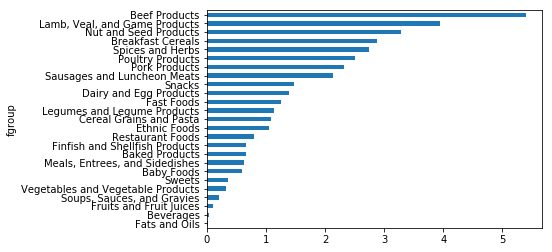

In [308]:
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)
result['Zinc, Zn'].sort_values().plot(kind='barh')

In [309]:
by_nutrient = ndata.groupby(['nutgroup', 'nutrient'])

get_maximum = lambda x: x.xs(x.value.idxmax())
get_minimum = lambda x: x.xs(x.value.idxmin())

max_foods = by_nutrient.apply(get_maximum)[['value', 'food']]

# make the food a little smaller
max_foods.food = max_foods.food.str[:50]

In [311]:
max_foods.loc['Amino Acids']['food']

nutrient
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
Cystine                Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                   Soy protein isolate
Glycine                           Gelatins, dry powder, unsweetened
Histidine                Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Na...
Methionine                    Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Proline                           Gelatins, dry powder, unsweetened
Serine            Soy protein isolate, 